In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/manifest-1692206474218.zip"

Archive:  /content/drive/MyDrive/manifest-1692206474218.zip
   creating: manifest-1692206474218/
  inflating: manifest-1692206474218/metadata.csv  
   creating: manifest-1692206474218/Vestibular-Schwannoma-MC-RC/
  inflating: manifest-1692206474218/Vestibular-Schwannoma-MC-RC/LICENSE  
   creating: manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-001/
   creating: manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-001/03-13-1988-NA-t1of3  External Images for PACS-75716/
   creating: manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-001/03-13-1988-NA-t1of3  External Images for PACS-75716/301.000000-T2I.A.C.      T2 TSE-69177/
  inflating: manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-001/03-13-1988-NA-t1of3  External Images for PACS-75716/301.000000-T2I.A.C.      T2 TSE-69177/1-01.dcm  
  inflating: manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-001/03-13-1988-NA-t1of3  External Images for PACS-75716/301.000000-T2I.A.C.      T2 TS

In [ ]:
! unzip "/content/drive/MyDrive/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023.zip"

Archive:  /content/drive/MyDrive/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023.zip
   creating: VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/
  inflating: VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/.DS_Store  
  inflating: VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/Vestibular-Schwannoma-MC-RC_NIfTI-segmentation-info3.csv  
   creating: VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/
  inflating: VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/.DS_Store  
   creating: VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-001/
  inflating: VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-001/.DS_Store  
   creating: VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentat

In [ ]:
!pip install SimpleITK
!pip install pyradiomics
!pip install pydicom matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 12.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11

In [ ]:
import SimpleITK as sitk
print(sitk.Version())


SimpleITK Version: 2.4.1 (ITK 5.4)
Compiled: Jan  9 2025 14:33:28



In [ ]:
import SimpleITK as sitk
from radiomics import featureextractor

In [ ]:
segmentation_path = '/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-030/1993-05-29/seg_T2.nii.gz'
segmentation_image = sitk.ReadImage(segmentation_path)
segmentation = sitk.GetArrayFromImage(segmentation_image)

In [ ]:
import numpy as np
print(np.unique(segmentation))


[0. 1.]


In [ ]:
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames('/content/manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-030/05-29-1993-NA-t1of3  MRI IAMS-57092/12.000000-T2t2spctraiso0.5-38532')
reader.SetFileNames(dicom_names)
image = reader.Execute()

In [ ]:
print(f"Image size: {image.GetSize()}, spacing: {image.GetSpacing()}, origin: {image.GetOrigin()}")
segmentation_size = segmentation.shape[::-1]
print(f"Segmentation size: {segmentation_size}, spacing: {segmentation_image.GetSpacing()}, origin: {segmentation_image.GetOrigin()}")


Image size: (384, 384, 60), spacing: (0.52083331346512, 0.52083331346512, 0.5000000000000078), origin: (-105.13193090924, -94.64892218966, -48.740628364608)
Segmentation size: (384, 384, 60), spacing: (0.5208333134651184, 0.5208333134651184, 0.5), origin: (-91.91168975830078, 101.4916763305664, -82.59363555908203)


In [ ]:

import SimpleITK as sitk
import numpy as np
from radiomics import featureextractor

def resample_segmentation_to_image(segmentation, reference_image):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(reference_image)
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)  # Use nearest neighbor for segmentation masks
    resampler.SetOutputSpacing(reference_image.GetSpacing())
    resampler.SetSize(reference_image.GetSize())
    resampler.SetOutputDirection(reference_image.GetDirection())
    resampler.SetOutputOrigin(reference_image.GetOrigin())
    return resampler.Execute(segmentation)

# Resample the segmentation mask to match the image
segmentation_resampled = resample_segmentation_to_image(segmentation_image, image)

# Convert the resampled segmentation to a NumPy array
segmentation_resampled_array = sitk.GetArrayFromImage(segmentation_resampled)

# Ensure that all non-zero values are set to 1 (binary mask)
segmentation_resampled_array[segmentation_resampled_array > 0] = 1

# Convert the array back to SimpleITK image
segmentation_resampled = sitk.GetImageFromArray(segmentation_resampled_array)
segmentation_resampled.CopyInformation(image)

In [ ]:
print(f"Resampled Segmentation Size: {segmentation_resampled.GetSize()}")
print(f"Resampled Segmentation Spacing: {segmentation_resampled.GetSpacing()}")
print(f"Resampled Segmentation Origin: {segmentation_resampled.GetOrigin()}")


Resampled Segmentation Size: (384, 384, 60)
Resampled Segmentation Spacing: (0.52083331346512, 0.52083331346512, 0.5000000000000078)
Resampled Segmentation Origin: (-105.13193090924, -94.64892218966, -48.740628364608)


In [ ]:
import numpy as np
print(np.unique(segmentation_resampled))


[0. 1.]


In [ ]:
from radiomics import featureextractor

# Initialize the radiomics feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Extract features using the aligned segmentation
features = extractor.execute(image, segmentation_resampled)

# Display the extracted features
for featureName, featureValue in features.items():
    print(f"{featureName}: {featureValue}")


INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firsto

diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: f686bf76334ea90f37439cd3e12a22e71237d379
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.52083331346512, 0.52083331346512, 0.5000000000000078)
diagnostics_Image-original_Size: (384, 384, 60)
diagnostics_Image-original_Mean: 58.83561005768953
diagnostics_Image-original_Minimum: 0.0
diagnostics_Image-original_

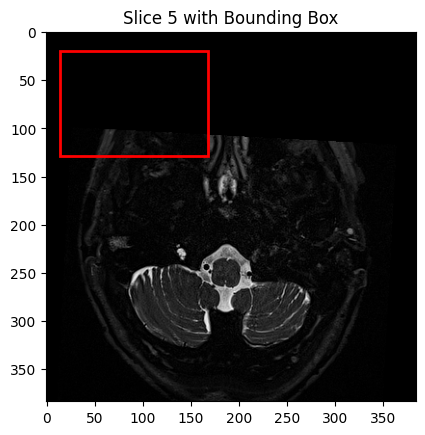

In [ ]:
import matplotlib.pyplot as plt
import SimpleITK as sitk

# Load the DICOM image (assuming it is already loaded as 'image')
# The image should be a 3D image if you have multiple slices
slice_index = 5  # Specify the Z-slice to visualize (e.g., 5th slice)

# Extract the slice from the 3D image
image_array = sitk.GetArrayFromImage(image)
slice_image = image_array[slice_index, :, :]  # Extract the slice at the specified index

# Bounding box coordinates (min and max for each dimension)
x_min, y_min, z_min, x_max, y_max, z_max = 168, 129, 5, 14, 20, 13

# Plot the 2D slice with bounding box overlay
plt.imshow(slice_image, cmap='gray')

# Plot the bounding box
plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, color='red', fill=False, linewidth=2))

# Display the plot
plt.title(f"Slice {slice_index} with Bounding Box")
plt.show()


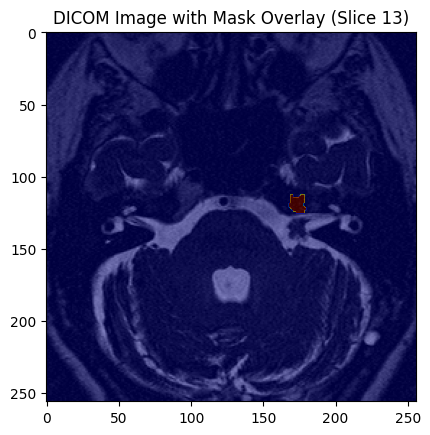

In [ ]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load the original DICOM image and mask
dicom_image_path = '/content/manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-001/03-13-1988-NA-t1of3  External Images for PACS-75716/301.000000-T2I.A.C.      T2 TSE-69177/1-14.dcm'
mask_image_path = '/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-001/1988-03-13/seg_T2.nii.gz'

dicom_image = sitk.ReadImage(dicom_image_path)
mask_image = sitk.ReadImage(mask_image_path)

# Convert the images to numpy arrays for visualization
dicom_array = sitk.GetArrayFromImage(dicom_image)
mask_array = sitk.GetArrayFromImage(mask_image)

# Since DICOM image is 2D (shape (1, 256, 256)), select the first slice
dicom_slice = dicom_array[0]  # Use the first slice (since it's the only one)

# Select a slice from the mask (choose any slice within the range of 30)
slice_index = 13 # Adjust this index based on the slice you want to visualize
mask_slice = mask_array[slice_index]  # Select the corresponding mask slice

# Plot the DICOM image and overlay the mask
plt.imshow(dicom_slice, cmap='gray')
plt.imshow(mask_slice, cmap='jet', alpha=0.5)  # Overlay the mask with transparency
plt.title(f'DICOM Image with Mask Overlay (Slice {slice_index})')
plt.show()


# **1989**

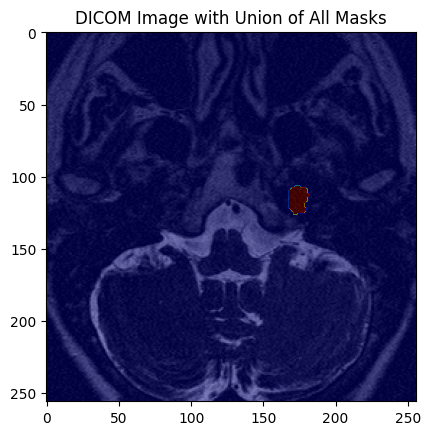

In [ ]:


import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Load the original DICOM image and mask
dicom_image_path = '/content/manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-001/03-13-1988-NA-t1of3  External Images for PACS-75716/301.000000-T2I.A.C.      T2 TSE-69177/1-01.dcm'
mask_image_path = '/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-001/1988-03-13/seg_T2.nii.gz'

dicom_image = sitk.ReadImage(dicom_image_path)
mask_image = sitk.ReadImage(mask_image_path)

# Convert the images to numpy arrays for visualization
dicom_array = sitk.GetArrayFromImage(dicom_image)
mask_array = sitk.GetArrayFromImage(mask_image)

# Since DICOM image is 2D (shape (1, 256, 256)), select the first slice
dicom_slice = dicom_array[0]  # Use the first slice (since it's the only one)

# Create an empty union mask with the same shape as a single mask slice
union_mask = np.zeros_like(mask_array[0])

# Iterate through each mask slice and combine them
for i in range(30):
    mask_slice = mask_array[i]  # Select the corresponding mask slice

    # Combine (union) the current mask with the union mask (mark as 1 if non-zero)
    union_mask = np.logical_or(union_mask, mask_slice > 0).astype(np.uint8)

# Plot the DICOM image and overlay the union of all masks
plt.imshow(dicom_slice, cmap='gray')
plt.imshow(union_mask, cmap='jet', alpha=0.5)  # Overlay the union mask with transparency
plt.title('DICOM Image with Union of All Masks')
plt.show()


In [ ]:
mask_array.shape

(30, 256, 256)

In [ ]:
import os

In [ ]:
list1=[10,20,30]
for i in range(10,20):
  list1.append(i)

In [ ]:
len(os.listdir('/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023'))

125

In [ ]:
segmentation_folder='/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023'
image_folder='/content/manifest-1692206474218/Vestibular-Schwannoma-MC-RC'

In [ ]:

patient_image=[]

In [ ]:
year_image=[]

In [ ]:
weight_folders=[]

In [ ]:
import os

dcm_paths = []        # To store the DICOM paths
weight_folders = []   # To store the corresponding weight folder paths

# Patient folders
for patient_folder in os.listdir(image_folder):
    patient_path = os.path.join(image_folder, patient_folder)

    # Check if it's a directory
    if not os.path.isdir(patient_path):
        continue

    # Year folders
    for year_folder in os.listdir(patient_path):
        year_path = os.path.join(patient_path, year_folder)

        # Check if it's a directory
        if not os.path.isdir(year_path):
            continue

        t2_found = False

        # Search for T2 weight folder
        for weight_folder in os.listdir(year_path):
            weight_path = os.path.join(year_path, weight_folder)

            if not os.path.isdir(weight_path):
                continue
            if "T2" in weight_folder:
                dcm_files = [f for f in os.listdir(weight_path) if f.endswith('.dcm')]

                if dcm_files:
                    dcm_paths.append(os.path.join(weight_path, dcm_files[0]))
                    weight_folders.append(weight_path)  # Store the weight folder path
                    t2_found = True
                    break  # Stop after selecting the first T2 folder

        # If no T2 folder found, look for T1 folder
        if not t2_found:
            for weight_folder in os.listdir(year_path):
                weight_path = os.path.join(year_path, weight_folder)

                if not os.path.isdir(weight_path):
                    continue
                if "T1" in weight_folder:
                    # Get the list of .dcm files in the selected T1 folder
                    dcm_files = [f for f in os.listdir(weight_path) if f.endswith('.dcm')]

                    if dcm_files:
                        dcm_paths.append(os.path.join(weight_path, dcm_files[0]))
                        weight_folders.append(weight_path)  # Store the weight folder path
                        break  # Stop after selecting the first T1 folder

# Print the stored DICOM and weight folder paths
for i in range(len(dcm_paths)):
    print(f"DICOM Path: {dcm_paths[i]}")
    print(f"Weight Folder Path: {weight_folders[i]}")


DICOM Path: /content/manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-084/08-19-1999-NA-t7of7  MRI IAMS-17009/8.000000-T2t2spctraiso0.5-81064/1-09.dcm
Weight Folder Path: /content/manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-084/08-19-1999-NA-t7of7  MRI IAMS-17009/8.000000-T2t2spctraiso0.5-81064
DICOM Path: /content/manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-084/01-17-1996-NA-t4of7  MRI IAMS-93301/8.000000-T2t2spcrsttrap2iso-36551/1-09.dcm
Weight Folder Path: /content/manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-084/01-17-1996-NA-t4of7  MRI IAMS-93301/8.000000-T2t2spcrsttrap2iso-36551
DICOM Path: /content/manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-084/04-11-1994-NA-t2of7  MRI IAMS-55048/7.000000-T2t2spcrsttraiso384-50220/1-09.dcm
Weight Folder Path: /content/manifest-1692206474218/Vestibular-Schwannoma-MC-RC/VS-MC-RC-084/04-11-1994-NA-t2of7  MRI IAMS-55048/7.000000-T2t2spcrsttraiso384-50220
DICOM Path: /content/

In [ ]:
patient_seg=[]
year_seg=[]

In [ ]:
# import os

# # List to store the paths of segmentation files
# seg_paths = []

# # segmentation folder
# for patient_folder in os.listdir(segmentation_folder):
#     patient_path = os.path.join(segmentation_folder, patient_folder)

#     # Check if it's a directory (patient folder)
#     if not os.path.isdir(patient_path):
#         continue

#     # patient folder
#     for year_folder in os.listdir(patient_path):
#         year_path = os.path.join(patient_path, year_folder)

#         # Check if it's a directory (year folder)
#         if not os.path.isdir(year_path):
#             continue

#         for file in os.listdir(year_path):
#             file_path = os.path.join(year_path, file)

#             # Check if it's a .nii or .nii.gz file
#             if os.path.isfile(file_path) and (file.endswith('.nii') or file.endswith('.nii.gz')):
#                 seg_paths.append(file_path)
#                 break


# for path in seg_paths:
#     print(path)


In [ ]:
import re

def extract_patient_info(file_paths):
    # Define a regex pattern to match the patient number/name and date
    pattern = r"/(?P<patient_name>(?:VS-(?:SEG|MC-RC)-)?\d+)/(?P<date_of_mri>\d{2}-\d{2}-\d{4})"

    # Dictionary to store results
    patient_img_data = []

    for file_path in file_paths:
        # Search for the pattern in each file path
        match = re.search(pattern, file_path)

        if match:
            # Extract the patient's name and date of MRI from the match
            patient_name = match.group("patient_name")
            date_of_mri = match.group("date_of_mri")
            patient_img_data.append({"patient_name": patient_name, "date_of_mri": date_of_mri})
        else:
            # Add an entry for unmatched paths
            patient_img_data.append({"patient_name": None, "date_of_mri": None})

    return patient_img_data

# Extract patient info
patient_img_data = extract_patient_info(dcm_paths)

# Print the extracted information
for info in patient_img_data:
    print(f"Patient Name: {info['patient_name']}, Date of MRI: {info['date_of_mri']}")


Patient Name: VS-MC-RC-084, Date of MRI: 08-19-1999
Patient Name: VS-MC-RC-084, Date of MRI: 01-17-1996
Patient Name: VS-MC-RC-084, Date of MRI: 04-11-1994
Patient Name: VS-MC-RC-059, Date of MRI: 12-29-1989
Patient Name: VS-MC-RC-059, Date of MRI: 02-16-1997
Patient Name: VS-MC-RC-059, Date of MRI: 07-27-1992
Patient Name: VS-MC-RC-019, Date of MRI: 05-17-1998
Patient Name: VS-MC-RC-019, Date of MRI: 02-26-1995
Patient Name: VS-SEG-172, Date of MRI: 11-28-1997
Patient Name: VS-SEG-172, Date of MRI: 04-03-1998
Patient Name: VS-SEG-172, Date of MRI: 06-08-1998
Patient Name: VS-MC-RC-035, Date of MRI: 05-19-1987
Patient Name: VS-MC-RC-035, Date of MRI: 04-16-1990
Patient Name: VS-MC-RC-035, Date of MRI: 11-15-1997
Patient Name: VS-SEG-188, Date of MRI: 11-19-1997
Patient Name: VS-SEG-188, Date of MRI: 01-27-1997
Patient Name: VS-SEG-028, Date of MRI: 02-16-1996
Patient Name: VS-SEG-028, Date of MRI: 11-02-2000
Patient Name: VS-SEG-028, Date of MRI: 12-03-1990
Patient Name: VS-MC-RC-033, 

In [ ]:
import os

# List to store the paths of segmentation files
seg_paths = []

# Iterate through patient image data to search for matches
for i in range(len(patient_img_data)):

    name = patient_img_data[i]['patient_name']
    date = patient_img_data[i]['date_of_mri']
    year = date[-4:]  # Extract the year

    for patient_folder in os.listdir(segmentation_folder):
        patient_path = os.path.join(segmentation_folder, patient_folder)

        # Check if it's a directory (patient folder)
        if not os.path.isdir(patient_path):
            continue

        # Check if the patient name matches
        if name not in patient_folder:
            continue

        # Iterate through the year folders within the patient folder
        for year_folder in os.listdir(patient_path):
            year_path = os.path.join(patient_path, year_folder)

            # Check if it's a directory (year folder)
            if not os.path.isdir(year_path):
                continue

            # Check if the year matches
            if year in year_path:
                # Search for .nii or .nii.gz files in the matched year folder
                for file in os.listdir(year_path):
                    file_path = os.path.join(year_path, file)

                    if os.path.isfile(file_path) and (file.endswith('.nii') or file.endswith('.nii.gz')):
                        seg_paths.append(file_path)  # Store the segmentation file path
                        break  # Stop searching files in this year folder
                break  # Stop searching other year folders once matched

# Print the stored segmentation paths
for path in seg_paths:
    print(path)


/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-084/1999-08-19/seg_T2.nii.gz
/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-084/1996-01-17/seg_T2.nii.gz
/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-084/1994-04-11/seg_T2.nii.gz
/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-059/1989-12-29/seg_T2.nii.gz
/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-059/1997-02-16/seg_T2.nii.gz
/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-059/1992-07-27/seg_T2.nii.gz
/content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-R

In [ ]:
import re

def extract_patient_info(file_paths):
    # Define a regex pattern to match the patient number/name and date
    pattern = r"/(?P<patient_name>(?:VS-(?:SEG|MC-RC)-)?\d+)/(?P<date_of_mri>\d{4}-\d{2}-\d{2})"

    # Dictionary to store results
    patient_seg_data = []

    for file_path in file_paths:
        # Search for the pattern in each file path
        match = re.search(pattern, file_path)

        if match:
            # Extract the patient's name and date of MRI from the match
            patient_name = match.group("patient_name")
            date_of_mri = match.group("date_of_mri")
            patient_seg_data.append({"patient_name": patient_name, "date_of_mri": date_of_mri})
        else:
            # Add an entry for unmatched paths
            patient_seg_data.append({"patient_name": None, "date_of_mri": None})

    return patient_seg_data


# Extract patient info
patient_seg_data = extract_patient_info(seg_paths)

# Print the extracted information
for info in patient_seg_data:
    print(f"Patient Name: {info['patient_name']}, Date of MRI: {info['date_of_mri']}")


Patient Name: VS-MC-RC-084, Date of MRI: 1999-08-19
Patient Name: VS-MC-RC-084, Date of MRI: 1996-01-17
Patient Name: VS-MC-RC-084, Date of MRI: 1994-04-11
Patient Name: VS-MC-RC-059, Date of MRI: 1989-12-29
Patient Name: VS-MC-RC-059, Date of MRI: 1997-02-16
Patient Name: VS-MC-RC-059, Date of MRI: 1992-07-27
Patient Name: VS-MC-RC-019, Date of MRI: 1998-05-17
Patient Name: VS-MC-RC-019, Date of MRI: 1995-02-26
Patient Name: VS-SEG-172, Date of MRI: 1997-11-28
Patient Name: VS-SEG-172, Date of MRI: 1998-04-03
Patient Name: VS-SEG-172, Date of MRI: 1998-04-03
Patient Name: VS-MC-RC-035, Date of MRI: 1987-05-19
Patient Name: VS-MC-RC-035, Date of MRI: 1990-04-16
Patient Name: VS-MC-RC-035, Date of MRI: 1997-11-15
Patient Name: VS-SEG-188, Date of MRI: 1997-11-19
Patient Name: VS-SEG-188, Date of MRI: 1997-11-19
Patient Name: VS-SEG-028, Date of MRI: 1996-02-16
Patient Name: VS-SEG-028, Date of MRI: 2000-11-02
Patient Name: VS-SEG-028, Date of MRI: 1990-12-03
Patient Name: VS-MC-RC-033, 

In [ ]:
print(len(patient_seg_data))
print(len(patient_img_data))

301
301


In [ ]:
for i in range(301):
  if patient_seg_data[i]['patient_name']!=patient_img_data[i]['patient_name']:
    print(i)


In [ ]:
index=[]

In [ ]:
mismatch=[]

In [ ]:
for i in range(301):
    date1 = patient_seg_data[i]['date_of_mri']
    patient = patient_seg_data[i]['patient_name']
    date2 = patient_img_data[i]['date_of_mri']


    if date1[0:4] != date2[-4:]:
        mismatch.append({"name": patient, "seg_date": date1, "img_date": date2})
        index.append(i)


In [ ]:
mismatch

[]

In [ ]:
len(mismatch)

0

In [ ]:
print(index,end=" ,")
len(index)

[] ,

0

In [ ]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from radiomics import featureextractor

# Function to resample segmentation to match the DICOM image
def resample_segmentation_to_image(segmentation_image, image):
    resampler = sitk.ResampleImageFilter()
    resampler.SetSize(image.GetSize())
    resampler.SetOutputSpacing(image.GetSpacing())
    resampler.SetOutputDirection(image.GetDirection())
    resampler.SetOutputOrigin(image.GetOrigin())
    resampler.SetTransform(sitk.Transform())
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)  # Nearest neighbor for masks
    return resampler.Execute(segmentation_image)

# Loop through the DICOM and segmentation pairs
for i in range(10):  # Update range as per your dataset
    segmentation_path = seg_paths[i]

    # Read segmentation and check if it has any valid region (non-zero values)
    segmentation_image = sitk.ReadImage(segmentation_path)
    segmentation = sitk.GetArrayFromImage(segmentation_image)

    if np.sum(segmentation) == 0:
        print(f"Warning: The segmentation mask at {segmentation_path} is empty (no regions are segmented).")
        continue  # Skip to the next iteration if segmentation is empty

    print(f"Original segmentation unique values: {np.unique(segmentation)}")

    # Load the corresponding DICOM series
    try:
        reader = sitk.ImageSeriesReader()
        dicom_names = reader.GetGDCMSeriesFileNames(weight_folders[i])  # Make sure weight_folders[i] is correct
        reader.SetFileNames(dicom_names)
        image = reader.Execute()
    except Exception as e:
        print(f"Error loading DICOM series for {segmentation_path}: {e}")
        continue  # Skip if DICOM loading fails

    # Resample the segmentation mask to match the DICOM image
    segmentation_resampled = resample_segmentation_to_image(segmentation_image, image)

    # Convert the resampled segmentation to a NumPy array and make it binary
    segmentation_resampled_array = sitk.GetArrayFromImage(segmentation_resampled)
    segmentation_resampled_array[segmentation_resampled_array > 0] = 1
    segmentation_resampled_array[segmentation_resampled_array <= 0] = 0

    print(f"Resampled segmentation unique values: {np.unique(segmentation_resampled_array)}")

    # Check if resampled segmentation has any non-zero labels
    if np.sum(segmentation_resampled_array) == 0:
        print(f"Warning: The resampled segmentation mask for {segmentation_path} is empty (no segmented regions found).")
        continue  # Skip to the next iteration if the resampled segmentation is empty

    # Convert back to SimpleITK image
    segmentation_resampled = sitk.GetImageFromArray(segmentation_resampled_array)
    segmentation_resampled.CopyInformation(image)

    # Initialize the radiomics feature extractor
    extractor = featureextractor.RadiomicsFeatureExtractor()

    # Enable only selected features for efficiency (example: shape-related features)
    extractor.enableAllFeatures()  # or you can specify features with: extractor.enableFeaturesByName('original_shape_VoxelVolume')

    # Extract features
    try:
        features = extractor.execute(image, segmentation_resampled, label=1)  # Label is 1 for binary mask
    except Exception as e:
        print(f"Error extracting features for {segmentation_path}: {e}")
        continue  # Skip if feature extraction fails

    # Print all the extracted features
    print(f"\nExtracted features for {segmentation_path}:")
    for featureName, featureValue in features.items():
        print(f"{featureName}: {featureValue}")

    # Optionally, store the extracted features (for example in a dictionary or a CSV file)


Original segmentation unique values: [0 1]


INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask


Resampled segmentation unique values: [0 1]


INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm



Extracted features for /content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-084/1999-08-19/seg_T2.nii.gz:
diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: e0d15c50c1bb37a1a1b1156fb78a2124cfde89d5
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.52083331346512, 0.52083331346512, 0.499999999

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask


Resampled segmentation unique values: [0 1]


INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm



Extracted features for /content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-084/1996-01-17/seg_T2.nii.gz:
diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: aec413462a06b3830341b7db9b293f4499591b20
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.3125, 0.3125, 0.6000000105963852)
diagnostics

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask


Resampled segmentation unique values: [0 1]


INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimensio


Extracted features for /content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-084/1994-04-11/seg_T2.nii.gz:
diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: 9356df2a685bb80ac5e2d1e58cb5a4c6b092d279
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.52083331346512, 0.52083331346512, 0.499999999

INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm



Extracted features for /content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-059/1989-12-29/seg_T2.nii.gz:
diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: a1cef28bace38ea0049ec53a91a35acf1cd3b30b
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.5078125, 0.5078125, 0.7000001068314783)
diagn

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask


Resampled segmentation unique values: [0 1]


INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm



Extracted features for /content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-059/1997-02-16/seg_T2.nii.gz:
diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: 402471c30d4dd95c6360b619a514fabe0ab93ab3
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.3516, 0.3516, 0.4999990561426213)
diagnostics

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask


Resampled segmentation unique values: [0. 1.]


INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm



Extracted features for /content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-059/1992-07-27/seg_T2.nii.gz:
diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: c4c80133a960e3101065fd9d37d6ade83d4663ba
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.3516, 0.3516, 0.4999991652376833)
diagnostics

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask


Resampled segmentation unique values: [0 1]


INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm



Extracted features for /content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-019/1998-05-17/seg_T2.nii.gz:
diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: 6e9b98d4d948355ec445d6c46487f74297ac7898
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.390625, 0.390625, 0.6000029576489356)
diagnos

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask


Resampled segmentation unique values: [0 1]


INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm



Extracted features for /content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-MC-RC-019/1995-02-26/seg_T2.nii.gz:
diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: f35c037fa46e02400d7a900c0e0e1a878948588f
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.3516, 0.3516, 0.500001460759393)
diagnostics_

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features 


Extracted features for /content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-SEG-172/1997-11-28/seg_T2.nii.gz:
diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: 62c824194463446d4e8e7b153dcbdaec0b3dd83c
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.3516, 0.3516, 0.5000006345417524)
diagnostics_I

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features 


Extracted features for /content/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023/VS-MC-RC segmentations-NIfTI-Release 2023/VS-SEG-172/1998-04-03/seg_T2.nii.gz:
diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.10.12
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: c0d8356108606de0d4fc8dafbc0d345538346383
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.3516, 0.3516, 0.5000003482562113)
diagnostics_I

In [ ]:
patient_num_years = {}

for i in range(len(patient_img_data)):
    patient_id = patient_img_data[i]['patient_name'][-3:]
    if patient_id in patient_num_years:
        patient_num_years[patient_id] += 1
    else:
        patient_num_years[patient_id] = 1


In [ ]:
patient_num_years

{'084': 3,
 '059': 6,
 '019': 2,
 '172': 3,
 '035': 3,
 '188': 2,
 '028': 6,
 '033': 1,
 '101': 1,
 '040': 3,
 '111': 1,
 '095': 6,
 '154': 3,
 '061': 1,
 '195': 1,
 '058': 5,
 '002': 3,
 '164': 2,
 '070': 4,
 '178': 3,
 '049': 5,
 '025': 6,
 '094': 3,
 '031': 6,
 '088': 3,
 '022': 3,
 '046': 2,
 '041': 5,
 '029': 1,
 '043': 1,
 '092': 3,
 '121': 3,
 '099': 3,
 '102': 1,
 '026': 2,
 '096': 2,
 '037': 3,
 '076': 4,
 '010': 6,
 '024': 3,
 '005': 2,
 '036': 2,
 '004': 3,
 '013': 6,
 '221': 3,
 '135': 3,
 '080': 2,
 '001': 3,
 '048': 1,
 '133': 3,
 '073': 3,
 '056': 1,
 '044': 5,
 '034': 3,
 '098': 6,
 '030': 6,
 '045': 6,
 '097': 3,
 '021': 3,
 '063': 3,
 '081': 3,
 '071': 3,
 '062': 3,
 '132': 3,
 '042': 3,
 '003': 3,
 '082': 5,
 '107': 1,
 '077': 5,
 '032': 3,
 '072': 1,
 '060': 5,
 '012': 2,
 '122': 1,
 '057': 3,
 '006': 3,
 '009': 3,
 '100': 4,
 '079': 2,
 '112': 1,
 '093': 3,
 '016': 2,
 '052': 3,
 '015': 3,
 '086': 3,
 '038': 3,
 '067': 2,
 '027': 2,
 '083': 3,
 '087': 3,
 '117': 1,

In [ ]:
len(patient_num_years)

103

In [ ]:
def extract_patient_name(path):
    pattern = r"/(?P<patient_name>(?:VS-(?:SEG|MC-RC)-)?\d+)/(?P<date_of_mri>\d{2}-\d{2}-\d{4})"
    match = re.search(pattern, path)
    if match:
        return match.group(1)
    return None

def extract_patient_year(path):
  pattern = r"/(?P<patient_name>(?:VS-(?:SEG|MC-RC)-)?\d+)/(?P<date_of_mri>\d{2}-\d{2}-\d{4})"
  match = re.search(pattern, path)
  if match:
    return match.group(2)
  return None

In [ ]:
features_dict = {}
x = []

for i in range(len(weight_folders)):
    segmentation_path = seg_paths[i]
    segmentation_image = sitk.ReadImage(segmentation_path)
    segmentation = sitk.GetArrayFromImage(segmentation_image)

    if np.sum(segmentation) == 0:
        print(f"Warning: The segmentation mask at {segmentation_path} is empty (no regions are segmented).")
        continue

    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(weight_folders[i])
    reader.SetFileNames(dicom_names)
    image = reader.Execute()

    patient_id = extract_patient_name(weight_folders[i])
    if patient_id is None:
        print(f"Warning: Could not extract patient ID from {weight_folders[i]}. Skipping.")
        continue

    try:
        patient_id = int(patient_id[-3:])
    except ValueError:
        print(f"Warning: Invalid patient ID format: {patient_id}. Skipping.")
        continue

    patient_year = extract_patient_year(weight_folders[i])
    if patient_year is None:
        print(f"Warning: Could not extract patient year from {weight_folders[i]}. Skipping.")
        continue

    try:
        patient_year = int(patient_year[-4:])
    except ValueError:
        print(f"Warning: Invalid patient year format: {patient_year}. Skipping.")
        continue

    segmentation_resampled = resample_segmentation_to_image(segmentation_image, image)
    segmentation_resampled_array = sitk.GetArrayFromImage(segmentation_resampled)
    segmentation_resampled_array[segmentation_resampled_array > 0] = 1
    segmentation_resampled_array[segmentation_resampled_array <= 0] = 0

    if np.sum(segmentation_resampled_array) == 0:
        print(f"Warning: The resampled segmentation mask for {segmentation_path} is empty (no segmented regions found).")
        continue

    segmentation_resampled = sitk.GetImageFromArray(segmentation_resampled_array)
    segmentation_resampled.CopyInformation(image)

    extractor = featureextractor.RadiomicsFeatureExtractor()
    extractor.enableAllFeatures()

    features = extractor.execute(image, segmentation_resampled, label=1)

    x.append(f"{patient_id}_{patient_year}")

    # Store features in a list to handle repeated patient IDs
    key = f"{patient_id}_{patient_year}"
    if key in features_dict:
        suffix = 1
        while f"{key}_{suffix}" in features_dict:
            suffix += 1
        key = f"{key}_{suffix}"

    if key not in features_dict:
        features_dict[key] = []
    features_dict[key].append(features)


INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features 

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features 

INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimensio

INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimensio

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features 

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
parameter force2D must be set to True to enable shape2D extraction
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features 

In [ ]:
len(features_dict)

296

In [ ]:
print(len(x))
print(x)

296
['84_1999', '84_1996', '84_1994', '59_1989', '59_1997', '59_1992', '19_1998', '19_1995', '172_1997', '172_1998', '172_1998', '35_1987', '35_1990', '35_1997', '188_1997', '188_1997', '28_1996', '28_2000', '28_1990', '33_1996', '101_1991', '40_1997', '40_1996', '40_1998', '111_1997', '95_1992', '95_1995', '95_1999', '154_1994', '154_1997', '154_2001', '61_1998', '195_2000', '58_1989', '58_1988', '2_1988', '2_1987', '2_1989', '164_2000', '164_1995', '70_1997', '178_1994', '178_1998', '178_2001', '59_1994', '59_1997', '59_2000', '49_1996', '49_1998', '49_1997', '25_1999', '25_1996', '25_1992', '94_1992', '94_1991', '94_1998', '31_1990', '31_1987', '31_1995', '88_1986', '88_1992', '88_2000', '22_1996', '22_1999', '22_1993', '46_1995', '46_1998', '41_1990', '41_1999', '41_1995', '29_1993', '43_1993', '92_1996', '92_2000', '92_1993', '121_1990', '121_1997', '121_1996', '99_1997', '99_1998', '99_1995', '102_1998', '26_1997', '26_1995', '96_1996', '96_1999', '37_1995', '37_1995', '37_1996',

In [ ]:
features_dict

Output hidden; open in https://colab.research.google.com to view.

In [ ]:




# voxel_volume_feature = {}
# for key, feature_list in features_dict.items():
#   # print(key)
#   # print(feature_list)
#   for feature in feature_list:
#       voxel_volume_feature[key] = feature.get('original_shape_MeshVolume', None)


# print(voxel_volume_feature)

voxel_volume_feature = {}
for key, feature_list in features_dict.items():
    for feature in feature_list:
        value = feature.get('original_shape_MeshVolume', None)
        voxel_volume_feature[key] = value.item() if isinstance(value, np.ndarray) else value

print(voxel_volume_feature)


{'84_1999': 1130.2918878685598, '84_1996': 520.2270599687803, '84_1994': 578.5906314936042, '59_1989': 76.43909985148672, '59_1997': 83.86744676188381, '59_1992': 88.66555766041978, '19_1998': 12.218535571731175, '19_1995': 25.141811592060325, '172_1997': 1784.7025316037218, '172_1998': 2877.5952390393795, '172_1998_1': 2866.1544799804688, '35_1987': 3669.882778650714, '35_1990': 3334.490211110535, '35_1997': 2098.9993954246, '188_1997': 3604.9610137939453, '188_1997_1': 3557.3900027035943, '28_1996': 464.7092111456221, '28_2000': 489.45320423087975, '28_1990': 255.67897188929012, '33_1996': 1382.8563160805782, '101_1991': 4541.953411433673, '40_1997': 1138.9216097777992, '40_1996': 1240.0439672124633, '40_1998': 865.3627528396249, '111_1997': 155.59000968933105, '95_1992': 7959.115321632646, '95_1995': 13690.465982148608, '95_1999': 1123.500996404248, '154_1994': 2669.277102308764, '154_1997': 2062.887167930603, '154_2001': 1894.3196614583342, '61_1998': 247.12652082342007, '195_2000'

In [ ]:
import pandas as pd
import numpy as np

data = []
for key, value in voxel_volume_feature.items():
    parts = key.split('_')

    if len(parts) > 2:
        patient_id = parts[0]
        year = parts[1] + "_" + parts[2]  # Create year_1 format
    else:
        patient_id, year = parts[0], parts[1]

    data.append((patient_id, year, value))


df = pd.DataFrame(data, columns=['Patient_ID', 'Year', 'Volume'])

# Pivot the DataFrame to create a table with Patient_ID as the index, Year as columns, and Volume as the values
volume_table = df.pivot(index='Patient_ID', columns='Year', values='Volume')

# Replace missing values with "N/A"
volume_table = volume_table.fillna("NaN")

In [ ]:
volume_table

Year,1986,1987,1988,1989,1990,1990_1,1991,1992,1993,1993_1,...,1996,1996_1,1997,1997_1,1998,1998_1,1999,1999_1,2000,2001
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,193.155072,176.648758,142.324132,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5117.44455,10200.411159,...,1629.070806,NaN,NaN,NaN,80.600882,NaN,802.424282,163.449613,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.501668,1433.907578,NaN,...,NaN,NaN,NaN,NaN,1624.653349,NaN,NaN,NaN,1489.762606,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,4541.953411,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,386.871804,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7959.115322,217.381028,NaN,...,1337.971044,NaN,NaN,NaN,NaN,NaN,1123.500996,NaN,2938.071341,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,930.932617,NaN,NaN,NaN,NaN,NaN,704.683329,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,4706.46844,NaN,17544.958925,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4344.710286,NaN,NaN,NaN


In [ ]:
volume_table.to_csv('volume_data.csv')

In [ ]:
volume_table

Year,1986,1987,1988,1989,1990,1990_1,1991,1992,1993,1993_1,...,1996,1996_1,1997,1997_1,1998,1998_1,1999,1999_1,2000,2001
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,193.155072,176.648758,142.324132,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5117.44455,10200.411159,...,1629.070806,NaN,NaN,NaN,80.600882,NaN,802.424282,163.449613,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.501668,1433.907578,NaN,...,NaN,NaN,NaN,NaN,1624.653349,NaN,NaN,NaN,1489.762606,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,4541.953411,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,386.871804,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7959.115322,217.381028,NaN,...,1337.971044,NaN,NaN,NaN,NaN,NaN,1123.500996,NaN,2938.071341,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,930.932617,NaN,NaN,NaN,NaN,NaN,704.683329,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,4706.46844,NaN,17544.958925,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4344.710286,NaN,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np

volume_diff_column = []


for idx, row in volume_table.iterrows():

    numeric_values = pd.to_numeric(row.dropna(), errors='coerce').dropna().values
    if len(numeric_values) > 1:
        first_numeric = int(numeric_values[0])
        last_numeric = int(numeric_values[-1])
        volume_diff = last_numeric - first_numeric
    else:
        volume_diff = np.nan


    volume_diff_column.append(volume_diff)

# Add the calculated 'volume_diff' as a new column
volume_table['volume_diff'] = volume_diff_column

# Create a new column based on whether the volume_diff is positive or negative
volume_table['change'] = volume_table['volume_diff'].apply(lambda x: 'increased' if x > 0 else 'not increased')


print(volume_table)


Year       1986 1987        1988        1989        1990 1990_1         1991  \
Patient_ID                                                                     
1           NaN  NaN  193.155072  176.648758  142.324132    NaN          NaN   
10          NaN  NaN         NaN         NaN         NaN    NaN          NaN   
100         NaN  NaN         NaN         NaN         NaN    NaN          NaN   
101         NaN  NaN         NaN         NaN         NaN    NaN  4541.953411   
102         NaN  NaN         NaN         NaN         NaN    NaN          NaN   
...         ...  ...         ...         ...         ...    ...          ...   
95          NaN  NaN         NaN         NaN         NaN    NaN          NaN   
96          NaN  NaN         NaN         NaN         NaN    NaN          NaN   
97          NaN  NaN         NaN         NaN         NaN    NaN   4706.46844   
98          NaN  NaN         NaN         NaN         NaN    NaN   193.442035   
99          NaN  NaN         NaN        

In [ ]:
numeric_values

array([157.86501621, 331.63086523, 575.99215508])

In [ ]:
volume_table.to_csv('volume_data.csv')

In [ ]:
volume_diff_column = []
id_year_column = []

for idx, row in volume_table.iterrows():
    # Extract numeric values and their column names (years)
    numeric_values = pd.to_numeric(row.dropna(), errors='coerce').dropna()
    years = numeric_values.index  # Column names corresponding to numeric values

    if len(numeric_values) > 1:
        # First and last numeric values and their corresponding years
        first_numeric = int(numeric_values.iloc[0])
        first_year = years[0]
        last_numeric = int(numeric_values.iloc[-2])
        last_year = years[-1]
        volume_diff = last_numeric - first_numeric
    else:
        first_numeric = last_numeric = first_year = last_year = np.nan
        volume_diff = np.nan

    # Assuming the patient ID is the index of the row
    patient_id = idx  # Update this if patient_id is stored in a column instead
    id_year_column.append(f"{patient_id}_{first_year}")

    volume_diff_column.append(volume_diff)

# Add the calculated 'volume_diff' and id_year as new columns
volume_table['volume_diff'] = volume_diff_column
volume_table['id_year'] = id_year_column

# Create a new column based on whether the volume_diff is positive or negative
volume_table['change'] = volume_table['volume_diff'].apply(lambda x: 'increased' if x > 0 else 'not increased')

print(volume_table)


Year       1986 1987        1988        1989        1990 1990_1         1991  \
Patient_ID                                                                     
1           NaN  NaN  193.155072  176.648758  142.324132    NaN          NaN   
10          NaN  NaN         NaN         NaN         NaN    NaN          NaN   
100         NaN  NaN         NaN         NaN         NaN    NaN          NaN   
101         NaN  NaN         NaN         NaN         NaN    NaN  4541.953411   
102         NaN  NaN         NaN         NaN         NaN    NaN          NaN   
...         ...  ...         ...         ...         ...    ...          ...   
95          NaN  NaN         NaN         NaN         NaN    NaN          NaN   
96          NaN  NaN         NaN         NaN         NaN    NaN          NaN   
97          NaN  NaN         NaN         NaN         NaN    NaN   4706.46844   
98          NaN  NaN         NaN         NaN         NaN    NaN   193.442035   
99          NaN  NaN         NaN        

In [ ]:
row

,99
Year,
1986,NaN
1987,NaN
1988,NaN
1989,NaN
1990,NaN
1990_1,NaN
1991,NaN
1992,NaN
1993,NaN


In [ ]:
first_year

'1995'

In [ ]:
numeric_values

,99
Year,
1995,157.865016
1997,331.630865
1998,575.992155
volume_diff,418.000000


In [ ]:
volume_table

Year,1986,1987,1988,1989,1990,1990_1,1991,1992,1993,1993_1,...,1997_1,1998,1998_1,1999,1999_1,2000,2001,volume_diff,change,id_year
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,193.155072,176.648758,142.324132,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.0,not increased,1_1988
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5117.44455,10200.411159,...,NaN,80.600882,NaN,802.424282,163.449613,NaN,NaN,-4954.0,not increased,10_1993
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.501668,1433.907578,NaN,...,NaN,1624.653349,NaN,NaN,NaN,1489.762606,NaN,1078.0,increased,100_1992
101,NaN,NaN,NaN,NaN,NaN,NaN,4541.953411,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not increased,101_nan
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,386.871804,NaN,NaN,NaN,NaN,NaN,NaN,not increased,102_nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7959.115322,217.381028,NaN,...,NaN,NaN,NaN,1123.500996,NaN,2938.071341,NaN,-5021.0,not increased,95_1992
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,704.683329,NaN,NaN,NaN,-226.0,not increased,96_1996
97,NaN,NaN,NaN,NaN,NaN,NaN,4706.46844,NaN,17544.958925,NaN,...,NaN,NaN,NaN,4344.710286,NaN,NaN,NaN,-362.0,not increased,97_1991


In [ ]:
volume_table.to_csv('volume_data.csv')

In [ ]:
import collections

def assess_elements(ordered_dict, start_index):
    """
    Assesses elements from a collections.OrderedDict starting from a specified index.

    Args:
        ordered_dict: The collections.OrderedDict to assess.
        start_index: The starting index to extract elements.

    Returns:
        A new collections.OrderedDict containing elements from the starting index onward,
        preserving the original order. Returns an empty OrderedDict if input start_index
        is invalid.
    """

    if not isinstance(ordered_dict, collections.OrderedDict):
        print("Error: Input is not an OrderedDict")
        return collections.OrderedDict()

    if not isinstance(start_index, int) or not (0 <= start_index < len(ordered_dict)):
        print("Error: Invalid starting index provided.")
        return collections.OrderedDict()

    new_ordered_dict = collections.OrderedDict()
    # Iterate through keys and values from the starting index onward
    for i, (key, value) in enumerate(ordered_dict.items()):
        if i >= start_index:
            new_ordered_dict[key] = value

    return new_ordered_dict

In [ ]:
year=[]

In [ ]:
for idx,row in volume_table.iterrows():
  year.append(idx)

In [ ]:
print(year)

['1', '10', '100', '101', '102', '104', '107', '11', '111', '112', '116', '117', '12', '121', '122', '126', '13', '132', '133', '135', '15', '154', '16', '164', '172', '178', '188', '19', '195', '197', '199', '2', '20', '21', '218', '22', '221', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '4', '40', '41', '42', '43', '44', '45', '46', '48', '49', '5', '52', '56', '57', '58', '59', '6', '60', '61', '62', '63', '65', '67', '7', '70', '71', '72', '73', '74', '76', '77', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '9', '92', '93', '94', '95', '96', '97', '98', '99']


In [ ]:
for idx, row in volume_table.iterrows():
    key = row[-1]

    if key in features_dict:
        features_name = []

        for features in features_dict[key]:
            features2 = assess_elements(features, 22)
            features_name = list(features2.keys())
            feature_array_value = np.array(list(features2.values()))


            for i in range(len(features2)):
                volume_table.at[idx, features_name[i]] = feature_array_value[i]


<ipython-input-67-4d5a1146da33>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  key = row[-1]
<ipython-input-67-4d5a1146da33>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  volume_table.at[idx, features_name[i]] = feature_array_value[i]
<ipython-input-67-4d5a1146da33>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  volume_table.at[idx, fe

In [ ]:
volume_table.to_csv('volume_data.csv')

In [1]:
import pandas as pd
import numpy as np

volume_table=pd.read_csv('/content/volume_data (2).csv')

In [2]:
volume_table

,Patient_ID,1986,1987,1988,1989,1990,1990_1,1991,1992,1993,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,NaN,NaN,193.155072,176.648758,142.324132,NaN,NaN,NaN,NaN,...,10.695441,0.076159,4.020056,0.045500,8.521760e+03,14.322749,0.005272,16.255589,0.019169,0.263056
1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5117.444550,...,57.868725,0.013403,6.973570,0.063062,5.320404e+04,15.880926,0.000200,315.506668,0.045854,0.102916
2,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.501668,1433.907578,...,24.570928,0.079790,5.386009,0.045967,2.677285e+04,7.586252,0.001724,124.716316,0.008457,0.862727
3,101,NaN,NaN,NaN,NaN,NaN,NaN,4541.953411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7959.115322,217.381028,...,1868.342346,0.000591,7.877374,0.505638,6.963322e+00,0.653778,0.000181,45966.516926,0.116004,2.272989
99,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.328863,0.052435,5.765773,0.074959,1.933909e+04,22.208299,0.000512,239.882013,0.034910,0.169586
100,97,NaN,NaN,NaN,NaN,NaN,NaN,4706.468440,NaN,17544.958925,...,4.581704,0.124419,4.079549,0.007004,1.466504e+06,412.638127,0.000341,4.082119,0.018861,0.005556
101,98,NaN,NaN,NaN,NaN,NaN,NaN,193.442035,NaN,NaN,...,146.077567,0.020586,5.339383,0.396861,2.499537e+01,0.048083,0.042671,180.085640,0.074152,10.306238


In [3]:
volume_table['volume_diff'].isnull().sum()

np.int64(19)

In [4]:
volume_table = volume_table.dropna(subset=['volume_diff'])
volume_table.to_csv('volume_data.csv')

In [5]:
# volume_table.to_csv('volume_data2.csv')

In [6]:
y=volume_table['change']
x=volume_table.drop(['change'],axis=1)

In [7]:
y=y.map({'increased':1,'not increased':0})

In [8]:
x

,Patient_ID,1986,1987,1988,1989,1990,1990_1,1991,1992,1993,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,NaN,NaN,193.155072,176.648758,142.324132,NaN,NaN,NaN,NaN,...,10.695441,0.076159,4.020056,0.045500,8.521760e+03,14.322749,0.005272,16.255589,0.019169,0.263056
1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5117.444550,...,57.868725,0.013403,6.973570,0.063062,5.320404e+04,15.880926,0.000200,315.506668,0.045854,0.102916
2,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.501668,1433.907578,...,24.570928,0.079790,5.386009,0.045967,2.677285e+04,7.586252,0.001724,124.716316,0.008457,0.862727
5,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.590036,0.032727,6.153552,0.032497,2.107124e+05,28.107412,0.000224,170.557762,0.008546,0.099903
10,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,195.093967,0.006905,6.279688,0.366775,3.358695e+01,0.331587,0.004580,1161.806559,0.212581,1.567448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7959.115322,217.381028,...,1868.342346,0.000591,7.877374,0.505638,6.963322e+00,0.653778,0.000181,45966.516926,0.116004,2.272989
99,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.328863,0.052435,5.765773,0.074959,1.933909e+04,22.208299,0.000512,239.882013,0.034910,0.169586
100,97,NaN,NaN,NaN,NaN,NaN,NaN,4706.468440,NaN,17544.958925,...,4.581704,0.124419,4.079549,0.007004,1.466504e+06,412.638127,0.000341,4.082119,0.018861,0.005556
101,98,NaN,NaN,NaN,NaN,NaN,NaN,193.442035,NaN,NaN,...,146.077567,0.020586,5.339383,0.396861,2.499537e+01,0.048083,0.042671,180.085640,0.074152,10.306238


In [9]:
y

,change
0,0
1,0
2,1
5,1
10,1
...,...
98,0
99,0
100,0
101,1


In [10]:
x=x.drop(['volume_diff'],axis=1)

In [11]:
x=x.drop(['id_year'],axis=1)

In [12]:
x=x.iloc[:,24:]

In [14]:
x

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.574892,4.205727e-01,4.667643e+00,11.098302,7.692140,10.667506,9.907894,11.824483,193.155072,6.380326,...,10.695441,0.076159,4.020056,0.045500,8.521760e+03,14.322749,0.005272,16.255589,0.019169,0.263056
1,0.947365,8.487106e-01,1.827824e+01,21.536483,28.766424,26.164538,26.907702,30.382305,5117.444550,20.402909,...,57.868725,0.013403,6.973570,0.063062,5.320404e+04,15.880926,0.000200,315.506668,0.045854,0.102916
2,0.627922,5.117784e-01,6.309704e+00,12.328976,13.201752,10.219315,13.907841,14.186897,411.501668,7.741632,...,24.570928,0.079790,5.386009,0.045967,2.677285e+04,7.586252,0.001724,124.716316,0.008457,0.862727
5,0.819366,6.270378e-01,1.407400e+01,22.445227,24.957680,21.909249,28.630228,30.658866,3716.363668,18.390864,...,32.590036,0.032727,6.153552,0.032497,2.107124e+05,28.107412,0.000224,170.557762,0.008546,0.099903
10,0.566162,4.617000e-01,5.191374e+00,11.244041,13.549769,9.044216,14.340992,14.719897,225.233459,6.365944,...,195.093967,0.006905,6.279688,0.366775,3.358695e+01,0.331587,0.004580,1161.806559,0.212581,1.567448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.928183,7.245156e-01,1.862981e+01,25.713471,27.993671,29.053397,30.438828,31.755931,7959.115322,23.866803,...,1868.342346,0.000591,7.877374,0.505638,6.963322e+00,0.653778,0.000181,45966.516926,0.116004,2.272989
99,0.551703,3.233265e-01,6.898770e+00,21.336850,25.325287,22.171152,15.264593,25.525113,930.932617,11.771609,...,30.328863,0.052435,5.765773,0.074959,1.933909e+04,22.208299,0.000512,239.882013,0.034910,0.169586
100,0.913757,8.395075e-01,1.770927e+01,21.094828,24.971271,22.875151,29.662510,30.669117,4706.468440,19.275554,...,4.581704,0.124419,4.079549,0.007004,1.466504e+06,412.638127,0.000341,4.082119,0.018861,0.005556
101,0.511322,2.845420e-16,3.552714e-15,12.485725,12.325000,6.792931,12.335728,12.414064,193.442035,6.384232,...,146.077567,0.020586,5.339383,0.396861,2.499537e+01,0.048083,0.042671,180.085640,0.074152,10.306238


# **Filter Method**

In [18]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Mutual Information
selector = SelectKBest(mutual_info_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(x,y)


In [19]:

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = x.columns[selected_feature_indices].tolist()

In [20]:
selected_feature_names

['original_shape_LeastAxisLength',
 'original_shape_Maximum2DDiameterRow',
 'original_shape_Maximum3DDiameter',
 'original_shape_SurfaceArea',
 'original_firstorder_Skewness',
 'original_glcm_InverseVariance',
 'original_gldm_HighGrayLevelEmphasis',
 'original_glrlm_HighGrayLevelRunEmphasis',
 'original_glszm_LargeAreaHighGrayLevelEmphasis',
 'original_ngtdm_Coarseness']

In [21]:
x_filter=x[selected_feature_names]

# **Wrapper Method**

In [22]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Recursive Feature Elimination
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(x, y)


In [23]:
selected_feature_indices_rfe = rfe.get_support(indices=True)
selected_feature_names_rfe = x.columns[selected_feature_indices_rfe].tolist()
selected_feature_names_rfe

['original_shape_MajorAxisLength',
 'original_shape_Maximum2DDiameterRow',
 'original_shape_SurfaceArea',
 'original_firstorder_Kurtosis',
 'original_firstorder_Skewness',
 'original_glcm_Contrast',
 'original_gldm_DependenceNonUniformity',
 'original_glrlm_GrayLevelNonUniformity',
 'original_glszm_LargeAreaHighGrayLevelEmphasis',
 'original_ngtdm_Strength']

In [24]:
x_wrapper=x[selected_feature_names_rfe]

In [25]:
x_wrapper

,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,original_shape_SurfaceArea,original_firstorder_Kurtosis,original_firstorder_Skewness,original_glcm_Contrast,original_gldm_DependenceNonUniformity,original_glrlm_GrayLevelNonUniformity,original_glszm_LargeAreaHighGrayLevelEmphasis,original_ngtdm_Strength
0,11.098302,10.667506,243.040707,7.950077,1.801399,0.794999,53.124629,222.335594,1.741270e+04,0.263056
1,21.536483,26.164538,2377.353152,1.694488,0.172758,4.901745,6142.058217,4745.951377,2.718900e+06,0.102916
2,12.328976,10.219315,377.011120,27.104321,3.330427,1.389235,235.279148,726.430933,2.136886e+05,0.862727
5,22.445227,21.909249,1695.619126,6.252598,0.861865,1.913342,2717.392350,5086.060334,5.612648e+06,0.099903
10,11.244041,9.044216,325.421572,2.632435,-0.511716,31.666206,324.893204,81.290984,2.437546e+04,1.567448
...,...,...,...,...,...,...,...,...,...,...
98,25.713471,29.053397,3115.937854,3.915124,0.529088,101.688557,19919.028846,1316.100261,2.002619e+04,2.272989
99,21.336850,22.171152,923.881939,4.177981,0.922420,4.454756,1345.133275,1618.573132,2.335827e+05,0.169586
100,21.094828,22.875151,1990.746794,4.070342,1.119503,0.400991,1155.424924,3720.610664,2.975252e+06,0.005556
101,12.485725,6.792931,219.779845,3.859257,-1.202306,5.776472,78.789238,23.802073,1.243502e+04,10.306238


# **Wrapper**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_wrapper, y, test_size=0.2, random_state=42)





sgd_classifier = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)

# Wrap training process in tqdm for progress bar
batch_size = 100  # Define the batch size
n_batches = len(X_train) // batch_size + (1 if len(X_train) % batch_size > 0 else 0)

for _ in tqdm(range(n_batches), desc="Training SVM Model in batches"):
    # Train in batches
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        sgd_classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

# Predict on the test set
y_pred = sgd_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Training SVM Model in batches: 100%|██████████| 1/1 [00:00<00:00, 321.13it/s]

Accuracy: 0.5294117647058824
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.53      1.00      0.69         9

    accuracy                           0.53        17
   macro avg       0.26      0.50      0.35        17
weighted avg       0.28      0.53      0.37        17




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
import joblib
import numpy as np

# Save selected feature indices
np.save("selected_feature_indices.npy", selected_feature_indices_rfe)

# Save selected feature names (optional, for reference)
with open("selected_feature_names.txt", "w") as f:
    f.write("\n".join(selected_feature_names_rfe))

In [28]:

X_train, X_test, y_train, y_test = train_test_split(x_wrapper, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)



y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.75      1.00      0.86         9

    accuracy                           0.82        17
   macro avg       0.88      0.81      0.81        17
weighted avg       0.87      0.82      0.82        17



In [29]:
len(X_test)

17

In [30]:
y_prob = rf_classifier.predict_proba(x_wrapper)
y_prob[:, 1]

array([0.95, 0.08, 0.93, 0.71, 0.62, 0.76, 0.94, 0.9 , 0.95, 0.88, 0.16,
       0.97, 0.26, 0.22, 0.8 , 0.94, 0.96, 0.9 , 0.69, 0.79, 0.77, 0.9 ,
       0.76, 0.74, 0.12, 0.77, 0.04, 0.93, 0.95, 0.88, 0.95, 0.75, 0.13,
       0.99, 0.1 , 0.62, 0.16, 0.21, 0.13, 0.89, 0.07, 0.17, 0.99, 0.41,
       0.25, 0.13, 0.08, 0.87, 0.94, 0.23, 0.91, 0.98, 0.99, 0.68, 0.97,
       0.65, 0.03, 1.  , 0.77, 0.26, 0.96, 0.92, 0.99, 0.34, 0.79, 0.48,
       0.81, 0.98, 0.3 , 0.99, 0.6 , 0.9 , 0.98, 0.96, 0.27, 0.77, 0.07,
       0.25, 0.17, 0.2 , 0.16, 0.19, 0.96, 0.9 ])

In [31]:
import pandas as pd
from google.colab import files

# Convert y to NumPy array if it's a Series
y = y.to_numpy() if isinstance(y, pd.Series) else y
y_prob = y_prob.to_numpy() if isinstance(y_prob, pd.DataFrame) else y_prob

# Ensure y and y_prob are 1D arrays
y = y.ravel()  # Use ravel() instead of flatten() for better performance
y_prob = y_prob[:, 1].ravel()  # Take only the second column and flatten

# Predicted labels based on threshold
predicted_labels = [1 if prob >= 0.5 else 0 for prob in y_prob]

# Creating DataFrame
df = pd.DataFrame({
    "Original": y,
    "Probability": y_prob,
    "Predicted": predicted_labels
})

# Save to CSV
file_path = "predictions.csv"
df.to_csv(file_path, index=False)

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the trained Random Forest model
joblib.dump(rf_classifier, "random_forest_model.pkl")


['random_forest_model.pkl']

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x_wrapper, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') #eval_metric added
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.80      0.89      0.84         9

    accuracy                           0.82        17
   macro avg       0.83      0.82      0.82        17
weighted avg       0.83      0.82      0.82        17



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:55:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_wrapper, y, test_size=0.2, random_state=42)

# Define the deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1) # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Deep Learning Model Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6403 - loss: 100988.4219 - val_accuracy: 0.7143 - val_loss: 6952.6318
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5875 - loss: 84760.6562 - val_accuracy: 0.7143 - val_loss: 3792.1309
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5979 - loss: 29376.2012 - val_accuracy: 0.7143 - val_loss: 889.8214
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5528 - loss: 8512.0713 - val_accuracy: 0.2857 - val_loss: 5114.6836
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.4021 - loss: 9891.3662 - val_accuracy: 0.2857 - val_loss: 9743.0488
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3812 - loss: 17990.8594 - val_accuracy: 0.2857 - val_loss: 12217.6240
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4139 - loss: 20323.5508 - val_accuracy: 0.4286 - val_loss: 13167.6514
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4132 - loss: 1

# **Filter**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.2, random_state=42)


sgd_classifier = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)

# Wrap training process in tqdm for progress bar
batch_size = 100  # Define the batch size
n_batches = len(X_train) // batch_size + (1 if len(X_train) % batch_size > 0 else 0)

for _ in tqdm(range(n_batches), desc="Training SVM Model in batches"):
    # Train in batches
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        sgd_classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

# Predict on the test set
y_pred = sgd_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Training SVM Model in batches: 100%|██████████| 1/1 [00:00<00:00, 277.42it/s]

Accuracy: 0.5294117647058824
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.53      1.00      0.69         9

    accuracy                           0.53        17
   macro avg       0.26      0.50      0.35        17
weighted avg       0.28      0.53      0.37        17




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7058823529411765
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.67      0.89      0.76         9

    accuracy                           0.71        17
   macro avg       0.73      0.69      0.69        17
weighted avg       0.73      0.71      0.69        17



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') #eval_metric added
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:56:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6470588235294118
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.64      0.78      0.70         9

    accuracy                           0.65        17
   macro avg       0.65      0.64      0.64        17
weighted avg       0.65      0.65      0.64        17



In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1) # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Deep Learning Model Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 596ms/step - accuracy: 0.4896 - loss: 0.7105 - val_accuracy: 0.5714 - val_loss: 0.7163
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5319 - loss: 0.6733 - val_accuracy: 0.5714 - val_loss: 0.6973
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5319 - loss: 0.6460 - val_accuracy: 0.7143 - val_loss: 0.6785
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6514 - loss: 0.6246 - val_accuracy: 0.7143 - val_loss: 0.6607
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7174 - loss: 0.6227 - val_accuracy: 0.7143 - val_loss: 0.6443
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7708 - loss: 0.5913 - val_accuracy: 0.7143 - val_loss: 0.6299
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7389 - loss: 0.5925 - val_accuracy: 0.7143 - val_loss: 0.6167
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7500 - loss: 0.5810 - val_accuracy: 0.5714 - val_loss: 0.6057
Epoch 9/50

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!unzip '/content/test_image.zip'

Archive:  /content/test_image.zip
   creating: test_image/
  inflating: test_image/image.0001.dcm  
  inflating: test_image/image.0002.dcm  
  inflating: test_image/image.0003.dcm  
  inflating: test_image/image.0004.dcm  
  inflating: test_image/image.0005.dcm  
  inflating: test_image/image.0006.dcm  
  inflating: test_image/image.0007.dcm  
  inflating: test_image/image.0008.dcm  
  inflating: test_image/image.0009.dcm  
  inflating: test_image/image.0010.dcm  
  inflating: test_image/image.0011.dcm  
  inflating: test_image/image.0012.dcm  
  inflating: test_image/image.0013.dcm  
  inflating: test_image/image.0014.dcm  
  inflating: test_image/image.0015.dcm  
  inflating: test_image/image.0016.dcm  
  inflating: test_image/image.0017.dcm  
  inflating: test_image/image.0018.dcm  
  inflating: test_image/image.0019.dcm  
  inflating: test_image/image.0020.dcm  
  inflating: test_image/image.0021.dcm  
  inflating: test_image/image.0022.dcm  
  inflating: test_image/image.0023.dcm 

In [ ]:
segmentation_path = '/content/vs_gk.nii.gz'
segmentation_image = sitk.ReadImage(segmentation_path)
segmentation = sitk.GetArrayFromImage(segmentation_image)

In [ ]:
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames('/content/test_image')
reader.SetFileNames(dicom_names)
image = reader.Execute()

In [ ]:
print(f"Image size: {image.GetSize()}, spacing: {image.GetSpacing()}, origin: {image.GetOrigin()}")
segmentation_size = segmentation.shape[::-1]
print(f"Segmentation size: {segmentation_size}, spacing: {segmentation_image.GetSpacing()}, origin: {segmentation_image.GetOrigin()}")


Image size: (416, 488, 81), spacing: (0.41015625, 0.41015625, 1.500000000000004), origin: (-83.768218994141, -118.15256500244, -78.500671386719)
Segmentation size: (416, 488, 81), spacing: (0.41015625, 0.41015625, 1.5), origin: (-83.76821899414062, -118.1525650024414, -78.50067138671875)


In [ ]:

import SimpleITK as sitk
import numpy as np
from radiomics import featureextractor

def resample_segmentation_to_image(segmentation, reference_image):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(reference_image)
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)  # Use nearest neighbor for segmentation masks
    resampler.SetOutputSpacing(reference_image.GetSpacing())
    resampler.SetSize(reference_image.GetSize())
    resampler.SetOutputDirection(reference_image.GetDirection())
    resampler.SetOutputOrigin(reference_image.GetOrigin())
    return resampler.Execute(segmentation)

# Resample the segmentation mask to match the image
segmentation_resampled = resample_segmentation_to_image(segmentation_image, image)

# Convert the resampled segmentation to a NumPy array
segmentation_resampled_array = sitk.GetArrayFromImage(segmentation_resampled)

# Ensure that all non-zero values are set to 1 (binary mask)
segmentation_resampled_array[segmentation_resampled_array > 0] = 1

# Convert the array back to SimpleITK image
segmentation_resampled = sitk.GetImageFromArray(segmentation_resampled_array)
segmentation_resampled.CopyInformation(image)

In [ ]:
print(f"Resampled Segmentation Size: {segmentation_resampled.GetSize()}")
print(f"Resampled Segmentation Spacing: {segmentation_resampled.GetSpacing()}")
print(f"Resampled Segmentation Origin: {segmentation_resampled.GetOrigin()}")


Resampled Segmentation Size: (416, 488, 81)
Resampled Segmentation Spacing: (0.41015625, 0.41015625, 1.500000000000004)
Resampled Segmentation Origin: (-83.768218994141, -118.15256500244, -78.500671386719)


In [ ]:
import numpy as np
print(np.unique(segmentation_resampled))


[0 1]


In [ ]:
from radiomics import featureextractor

# Initialize the radiomics feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Extract features using the aligned segmentation
features = extractor.execute(image, segmentation_resampled)

# Display the extracted features
for featureName, featureValue in features.items():
    print(f"{featureName}: {featureValue}")


INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firsto

diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 1.26.4
diagnostics_Versions_SimpleITK: 2.4.1
diagnostics_Versions_PyWavelet: 1.8.0
diagnostics_Versions_Python: 3.11.11
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: 92cf03127dc38c8fff5216b51da17dfd9cfa3758
diagnostics_Image-original_Dimensionality: 3D
diagnostics_Image-original_Spacing: (0.41015625, 0.41015625, 1.500000000000004)
diagnostics_Image-original_Size: (416, 488, 81)
diagnostics_Image-original_Mean: 313.05673436940515
diagnostics_Image-original_Minimum: 0.0
diagnostics_Image-original_Maximum: 182

In [ ]:
from radiomics import featureextractor
import pandas as pd


extractor = featureextractor.RadiomicsFeatureExtractor()


features = extractor.execute(image, segmentation_resampled)


features_df = pd.DataFrame([features])


print(features_df)

features_df.to_csv("radiomics_features.csv", index=False)


INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firsto

  diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0                           v3.0.1                     1.26.4   

  diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                          2.4.1                          1.8.0   

  diagnostics_Versions_Python  \
0                     3.11.11   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   

  diagnostics_Configuration_EnabledImageTypes  \
0                            {'Original': {}}   

            diagnostics_Image-original_Hash  \
0  92cf03127dc38c8fff5216b51da17dfd9cfa3758   

  diagnostics_Image-original_Dimensionality  \
0                                        3D   

            diagnostics_Image-original_Spacing  ...  \
0  (0.41015625, 0.41015625, 1.500000000000004)  ...   

  original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                             262.3324686758719   

   original_glszm_SmallAreaLowGrayLevelEmphasis  or

In [ ]:
import pandas as pd

# Load the CSV file
test_data = pd.read_csv('/content/radiomics_features.csv')

# Select the specified columns
selected_columns = [
    'original_shape_MajorAxisLength',
    'original_shape_Maximum2DDiameterRow',
    'original_shape_SurfaceArea',
    'original_firstorder_Kurtosis',
    'original_firstorder_Skewness',
    'original_glcm_Idn',
    'original_glrlm_RunLengthNonUniformity',
    'original_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_ngtdm_Contrast',
    'original_ngtdm_Strength'
]

# Create a new DataFrame with only the selected columns
selected_data = test_data[selected_columns]

In [ ]:
selected_data

,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,original_shape_SurfaceArea,original_firstorder_Kurtosis,original_firstorder_Skewness,original_glcm_Idn,original_glrlm_RunLengthNonUniformity,original_glszm_LargeAreaHighGrayLevelEmphasis,original_ngtdm_Contrast,original_ngtdm_Strength
0,21.923348,23.02157,1516.130464,3.754866,-0.817199,0.918996,10090.964937,688585.06361,0.087546,0.316453


In [ ]:
prediction = rf_classifier.predict(selected_data)

In [ ]:
print("Prediction:", prediction[0])

Prediction: 0


In [ ]:
if prediction[0] == 0:
    print("Not increased")
else:
    print("Increased")

Not increased
